In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn.preprocessing as sk
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
from pandas.tools.plotting import radviz
from pandas.tools.plotting import bootstrap_plot
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.3)

In [4]:
import warnings
warnings.filterwarnings('ignore', lineno=590)
warnings.filterwarnings('ignore', lineno=403)

In [7]:
# Read the table from a CSV file
df_stock = pd.read_csv('gasoline.csv', parse_dates=True, index_col=0)

# Reset the index to PeriodIndex
# "B" means business day.
df_stock = df_stock.to_period("W-SAT")

In [4]:
df_stock.tail()

,Regular,Midgrade,Premium,Diesel
Date,,,,
2015-10-18/2015-10-24,2.277,2.505,2.705,2.531
2015-10-25/2015-10-31,2.228,2.460,2.663,2.498
2015-11-01/2015-11-07,2.224,2.455,2.660,2.485
2015-11-08/2015-11-14,2.235,2.468,2.678,2.502
2015-11-15/2015-11-21,2.178,2.420,2.633,2.482


# #2

### a.)

In [5]:
df_stock.Regular.ix['2015-10-19']

2.2769999999999997

### b.)

In [6]:
df_stock.Diesel.ix['2013-03-18':'2013-04-08']

Date
2013-03-17/2013-03-23    4.047
2013-03-24/2013-03-30    4.006
2013-03-31/2013-04-06    3.993
2013-04-07/2013-04-13    3.977
Freq: W-SAT, Name: Diesel, dtype: float64

### c.)

In [7]:
df_stock.Midgrade.asof("2015-10-21")

2.5049999999999999

### d.)

In [8]:
df_stock.Midgrade.pct_change().ix["2015-10-19"]

-0.021866458414681933

### e.)

In [9]:
resampled = df_stock.resample('M', how='mean')
resampled.head()

,Regular,Midgrade,Premium,Diesel
Date,,,,
1994-11,1.1050,1.19700,1.30300,1.12600
1994-12,1.0905,1.18375,1.28450,1.11300
1995-01,1.0818,1.17360,1.27480,1.09820
1995-02,1.0725,1.16475,1.26475,1.08775
1995-03,1.0720,1.16125,1.25800,1.08750


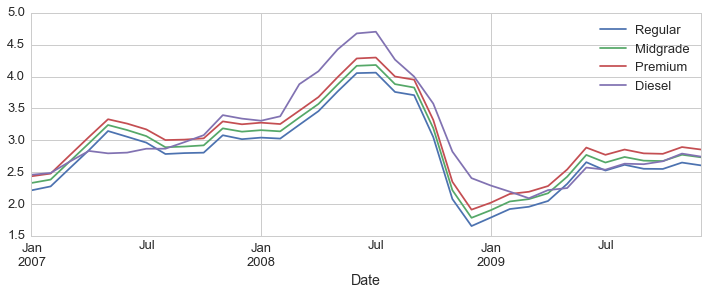

In [10]:
# We can plot the data using pandas's built-in function.
fig, ax = plt.subplots(figsize=(12,4))
resampled.ix['2007-01':'2009-12', ['Regular', 'Midgrade', 'Premium', 'Diesel']].plot(ax=ax)

### f.)

In [11]:
weekly = df_stock.resample('W', how='mean')
weekly.head()

,Regular,Midgrade,Premium,Diesel
Date,,,,
1994-11-21/1994-11-27,1.105,1.197,1.303,1.126
1994-11-28/1994-12-04,1.103,1.197,1.301,1.123
1994-12-05/1994-12-11,1.095,1.188,1.288,1.114
1994-12-12/1994-12-18,1.087,1.179,1.279,1.109
1994-12-19/1994-12-25,1.077,1.171,1.270,1.106


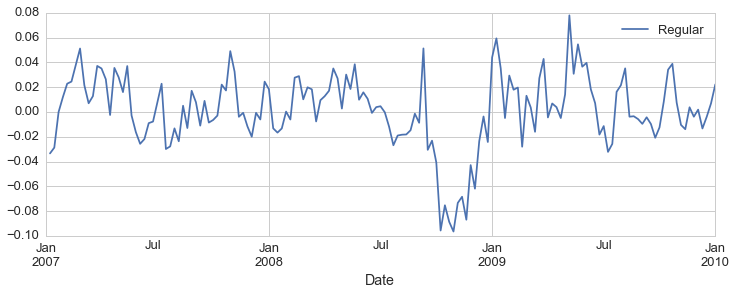

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
weekly.ix['2007-01':'2009-12', ['Regular']].pct_change().plot(ax=ax)

# #3

### a.)

In [8]:
# df_stock_filtered = df_stock['1994':'2015'].to_timestamp()

# ts_reg = df_stock_filtered.Regular

# decompose_result = sm.tsa.seasonal_decompose(ts_reg)
# _ = decompose_result.plot()
df_stock.head()

,Regular,Midgrade,Premium,Diesel
Date,,,,
1994-11-27/1994-12-03,1.105,1.197,1.303,1.126
1994-12-04/1994-12-10,1.103,1.197,1.301,1.123
1994-12-11/1994-12-17,1.095,1.188,1.288,1.114
1994-12-18/1994-12-24,1.087,1.179,1.279,1.109
1994-12-25/1994-12-31,1.077,1.171,1.270,1.106


### b.)

In [14]:
df_trend= pd.read_csv('googletrends_b.csv', parse_dates=True, index_col=0)
df_trend = df_trend.to_period('W-SAT')  # week ending on Saturday
df_trend.head()

,suv,truck,scrap metal,best mpg
Week,,,,
2005-02-13/2005-02-19,45,74,37,22
2005-02-20/2005-02-26,47,70,46,19
2005-02-27/2005-03-05,42,66,27,19
2005-03-06/2005-03-12,46,66,24,19
2005-03-13/2005-03-19,45,69,36,22


In [15]:
df_trend.tail()

,suv,truck,scrap metal,best mpg
Week,,,,
2015-10-11/2015-10-17,62,85,79,21
2015-10-18/2015-10-24,63,86,74,22
2015-10-25/2015-10-31,60,84,69,19
2015-11-01/2015-11-07,57,86,70,19
2015-11-08/2015-11-14,58,80,68,17


In [16]:
df_trend_filtered = df_trend['2005':'2015'].to_timestamp()
ts_truck = df_trend_filtered.truck

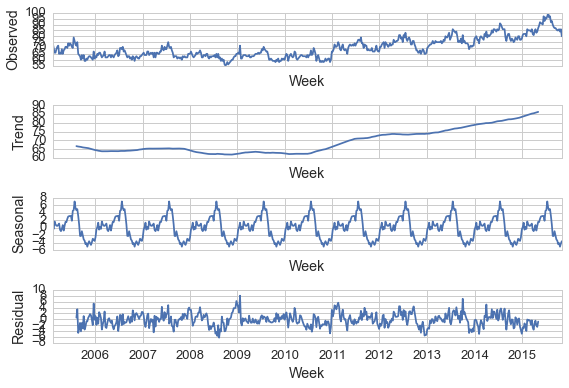

In [17]:
# decompose time series of turkey
decompose_result = sm.tsa.seasonal_decompose(ts_truck)
_ = decompose_result.plot()

### c.)

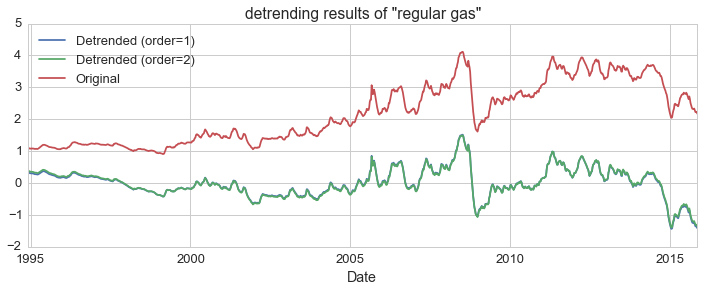

In [18]:
cols = [sm.tsa.tsatools.detrend(ts_reg, order) for order in range(1,3)]
cols.append(ts_reg.values)
df_reg = pd.DataFrame(np.array(cols).T, 
                         columns=['Detrended (order=1)',
                                  'Detrended (order=2)',
                                  'Original'],
                         index=ts_reg.index)
fig, ax = plt.subplots(figsize=(12,4))
df_reg.plot(ax=ax)
plt.title('detrending results of "regular gas"')

### d.)

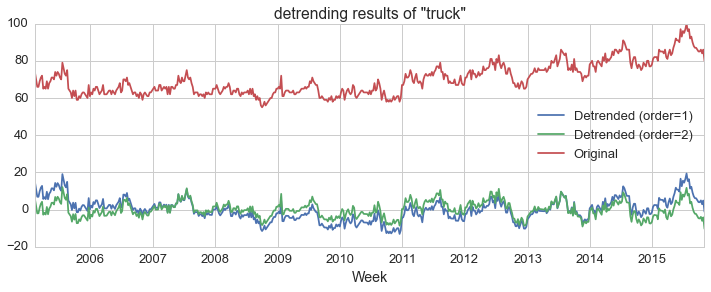

In [19]:
cols = [sm.tsa.tsatools.detrend(ts_truck, order) for order in range(1,3)]
cols.append(ts_truck.values)
df_truck = pd.DataFrame(np.array(cols).T, 
                         columns=['Detrended (order=1)',
                                  'Detrended (order=2)',
                                  'Original'],
                         index=ts_truck.index)
fig, ax = plt.subplots(figsize=(12,4))
df_truck.plot(ax=ax)
plt.title('detrending results of "truck"')

# #4

### a.)

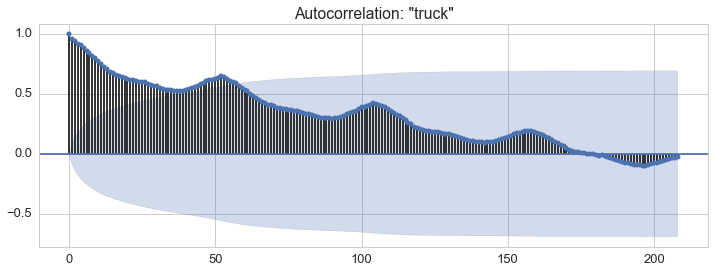

In [20]:
# Plot autocorrelation function (ACF) of the data of "truck".
fig, ax = plt.subplots(figsize=(12,4)) 
smg.tsaplots.plot_acf(ts_truck, ax=ax, lags = 208)
plt.title('Autocorrelation: "truck"')

### b.)

This autocorrelation picture shows that there is not clear pattern with the search query "truck". There is some correlation between 0 and 40, but for the most part it is white noise and there is no perceivable correlation in search patterns.

### c.)

In [21]:
df_combined = pd.concat((df_stock, df_trend), axis=1) #concatenates the two by columns (signified by axis = 1)
df_combined = df_combined.fillna(method='ffill') #forward fill any missing value points
df_combined = df_combined[df_combined.index >= '2005-03-01'] #limit dataframe to values on or after 2005-03-01
#df_combined = df_combined.resample('W') this line resamples the concatenated data sets so that the freq is by week
df_combined.head()

,Regular,Midgrade,Premium,Diesel,suv,truck,scrap metal,best mpg
2005-02-27/2005-03-05,1.928,2.025,2.113,2.118,42,66,27,19
2005-03-06/2005-03-12,1.999,2.094,2.182,2.168,46,66,24,19
2005-03-13/2005-03-19,2.056,2.151,2.241,2.194,45,69,36,22
2005-03-20/2005-03-26,2.109,2.200,2.292,2.244,44,71,34,26
2005-03-27/2005-04-02,2.153,2.250,2.336,2.249,46,72,39,26


### d.)

In [22]:
dfcombined2 = df_combined.copy()
dfcombined2.ix[:,:8] = sk.scale(dfcombined2.ix[:,:8])
dfcombined2.head()

,Regular,Midgrade,Premium,Diesel,suv,truck,scrap metal,best mpg
2005-02-27/2005-03-05,-1.818632,-1.868773,-1.912128,-1.728651,0.047798,-0.470083,-1.837506,-0.688322
2005-03-06/2005-03-12,-1.695442,-1.750010,-1.795196,-1.652739,0.451823,-0.470083,-1.993660,-0.688322
2005-03-13/2005-03-19,-1.596542,-1.651902,-1.695210,-1.613264,0.350817,-0.126419,-1.369044,-0.451940
2005-03-20/2005-03-26,-1.504583,-1.567564,-1.608781,-1.537352,0.249811,0.102690,-1.473147,-0.136764
2005-03-27/2005-04-02,-1.428240,-1.481504,-1.534215,-1.529761,0.451823,0.217245,-1.212890,-0.136764


### e.)

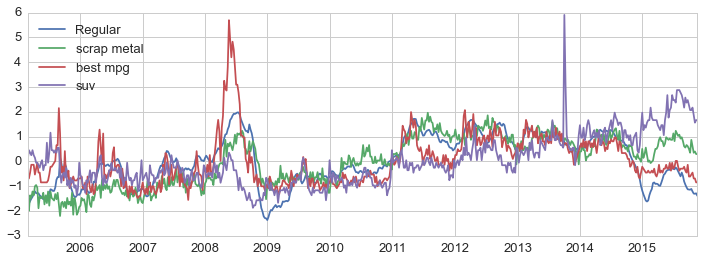

In [23]:
# We can plot the data using pandas's built-in function.
fig, ax = plt.subplots(figsize=(12,4))
dfcombined2[['Regular', 'scrap metal', 'best mpg', 'suv']].plot(ax=ax)

### f.)

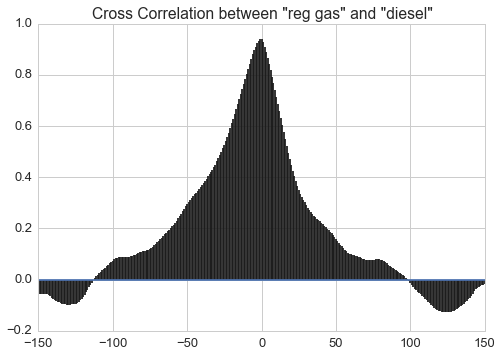

In [24]:
ts_diesel = dfcombined2.Diesel
ts_reg = dfcombined2.Regular
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_reg.astype(float), 
          ts_diesel.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "reg gas" and "diesel"')

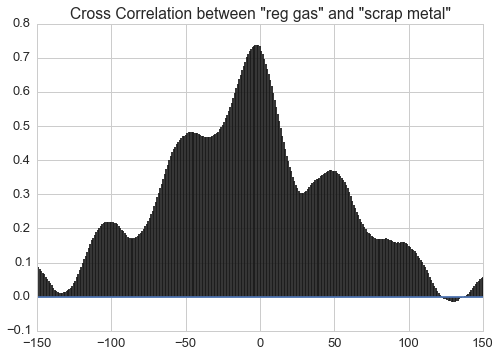

In [26]:
ts_scrap = dfcombined2['scrap metal']
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_reg.astype(float), 
          ts_scrap.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "reg gas" and "scrap metal"')

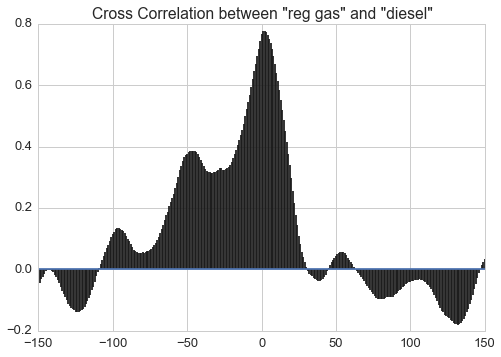

In [27]:
ts_mpg = dfcombined2["best mpg"]
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_reg.astype(float), 
          ts_mpg.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "reg gas" and "diesel"')

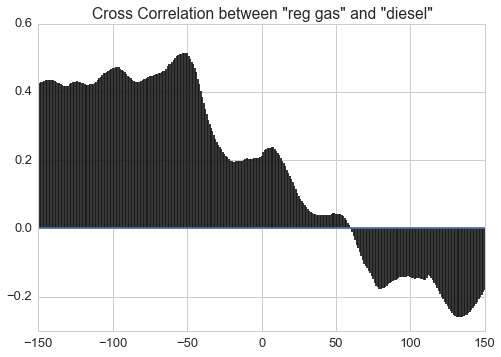

In [28]:
ts_suv = dfcombined2.suv
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_reg.astype(float), 
          ts_suv.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "reg gas" and "diesel"')

(array([-150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140,
        -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129,
        -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118,
        -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107,
        -106, -105, -104, -103, -102, -101, -100,  -99,  -98,  -97,  -96,
         -95,  -94,  -93,  -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,
         -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,
         -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,
         -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,
         -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,
         -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,
         -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,
         -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,
          -7,   -6,   -5,   -4,   -3, 

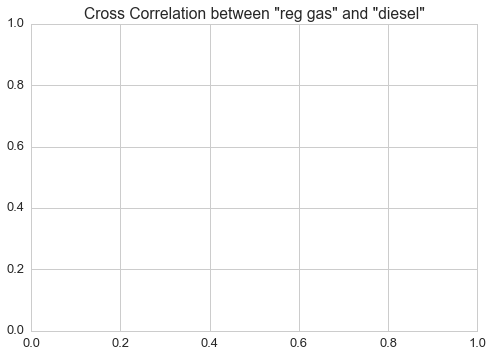

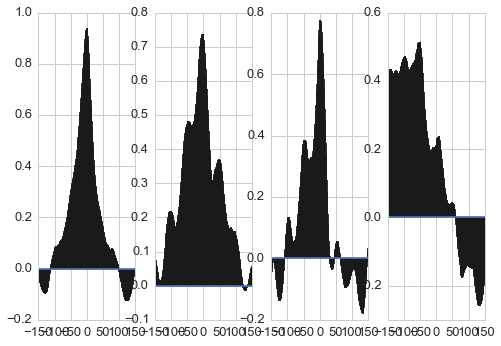

In [37]:
ts_diesel = dfcombined2.Diesel
ts_reg = dfcombined2.Regular
# Cross correlation plot using matplotlib's xcorr() function
plt.title('Cross Correlation between "reg gas" and "diesel"')

ts_scrap = dfcombined2['scrap metal']
# Cross correlation plot using matplotlib's xcorr() function
plt.title('Cross Correlation between "reg gas" and "scrap metal"')

ts_mpg = dfcombined2["best mpg"]
# Cross correlation plot using matplotlib's xcorr() function
plt.title('Cross Correlation between "reg gas" and "diesel"')

ts_suv = dfcombined2.suv
# Cross correlation plot using matplotlib's xcorr() function
plt.title('Cross Correlation between "reg gas" and "diesel"')

fig, axes = plt.subplots(ncols=4)
axes[0].xcorr(ts_reg.astype(float), 
          ts_diesel.astype(float),
          maxlags=150)
axes[1].xcorr(ts_reg.astype(float), 
          ts_scrap.astype(float),
          maxlags=150)
axes[2].xcorr(ts_reg.astype(float), 
          ts_mpg.astype(float),
          maxlags=150)
axes[3].xcorr(ts_reg.astype(float), 
          ts_suv.astype(float),
          maxlags=150)

#the graphs on one row is at the bottom of the output 

### g.)

Diesel has the highest correlation with regular gasoline. Second is Regular vs. "best mpg" and third is Regular vs. "scrap metal". This is intuitive because gas prices for varying oil types tend to fluctuate in tandem. Also, the type of gas you use will probably be related to the number of miles per gallon, so there is a high correlation.

# #5

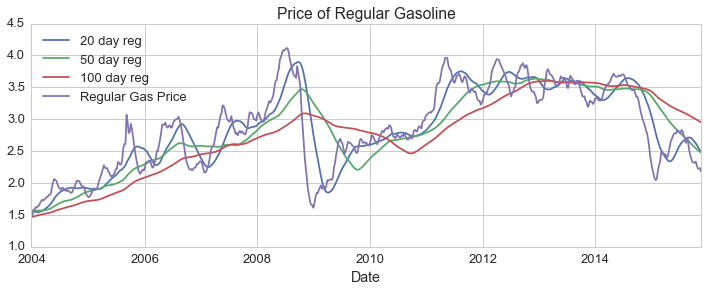

In [39]:
# Plot the prices with rollling means
ts_reg2 = df_stock.Regular
windows = [20,50,100]
cols = [pd.rolling_mean(ts_reg2, w) for w in windows]
df_reg_ma = pd.DataFrame(cols + [ts_reg2]).T
df_reg_ma.columns = ['%d day reg'%w for w in windows] + ['Regular Gas Price']

fig, ax = plt.subplots(figsize=(12,4))
df_reg_ma['2004':'2015'].plot(ax=ax)
plt.title('Price of Regular Gasoline')

# Extra Credit

In [31]:
# Read the table from a CSV file
dfxenophobia = pd.read_csv('correlate-xenophobia.csv', parse_dates=True, index_col=0, header=11)

# Reset the index to PeriodIndex
# "B" means business day.
dfxenophobia.dropna().head()

,xenophobia,xenophobia definition,define xenophobia,what is xenophobia,the cost,ways to reduce,the cost of,can be done,consume,what can be done,...,what century,1 in,with more than,what makes a,a loss,the 2,with other,how long did it take,impede,capitalize
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,-1.415,-1.243,-1.195,-1.007,-0.997,-1.044,-0.892,-1.435,-1.503,-1.382,...,-0.948,-1.378,-1.113,-0.986,-1.444,-0.896,-1.217,-0.601,-1.616,-1.467
2004-01-11,-0.712,-1.243,-1.195,2.080,-1.072,-0.956,-1.006,-1.414,-1.371,-1.453,...,-1.036,-1.505,-1.748,-1.120,-1.390,-0.806,-1.380,-0.631,-1.256,-1.458
2004-01-18,-0.938,-1.243,-1.195,-1.007,-1.133,-1.182,-0.952,-1.111,-1.670,-1.025,...,-0.991,-1.577,-1.500,-0.924,-1.378,-0.852,-1.381,-0.781,-1.616,-1.600
2004-01-25,-0.964,0.226,-1.195,-1.007,-1.066,-1.336,-0.940,-0.926,-1.361,-0.942,...,-1.127,-1.531,-1.046,-0.964,-1.233,-1.022,-1.241,-0.614,-1.206,-1.440
2004-02-01,-0.857,-1.243,-1.195,-1.007,-0.961,-1.182,-0.779,-1.078,-1.741,-1.187,...,-1.081,-1.539,-1.430,-0.971,-0.968,-0.722,-1.393,-0.965,-0.888,-1.353


In [188]:
# Read the table from a CSV file
dfrefugees = pd.read_csv('correlate-syrian_refugees.csv', parse_dates=True, index_col=0, header=11)

# Reset the index to PeriodIndex
# "B" means business day.
dfrefugees.dropna().head()

,syrian refugees,syrian refugee,syrian refugee camps,syria refugees,syrian refugees in jordan,number of syrian refugees,jesus take the wheel gif,rtw 2,nu1,google translate spanish,...,microsoft 2013,365 email login,flatbush zombies,twerking videos,moodle 2,core reading,z1 specs,sign out of chrome,digimon fusion,usciences blackboard
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,-0.473,-0.46,-0.443,-0.433,-0.455,-0.413,-0.483,-0.43,-0.52,-0.555,...,-0.505,-0.463,-0.516,-0.52,-0.5,-0.320,-0.401,-0.534,-0.429,-0.433
2004-01-11,-0.473,-0.46,-0.443,-0.433,-0.455,-0.413,-0.483,-0.43,-0.52,-0.555,...,-0.505,-0.463,-0.516,-0.52,-0.5,-0.351,-0.401,-0.534,-0.429,-0.433
2004-01-18,-0.473,-0.46,-0.443,-0.433,-0.455,-0.413,-0.483,-0.43,-0.52,-0.555,...,-0.505,-0.463,-0.516,-0.52,-0.5,-0.763,-0.401,-0.534,-0.429,-0.433
2004-01-25,-0.473,-0.46,-0.443,-0.433,-0.455,-0.413,-0.483,-0.43,-0.52,-0.555,...,-0.505,-0.463,-0.516,-0.52,-0.5,-0.515,-0.401,-0.534,-0.429,-0.433
2004-02-01,-0.473,-0.46,-0.443,-0.433,-0.455,-0.413,-0.483,-0.43,-0.52,-0.555,...,-0.505,-0.463,-0.516,-0.52,-0.5,-0.763,-0.401,-0.534,-0.429,-0.433


In [189]:
# Read the table from a CSV file
dfisis = pd.read_csv('correlate-isis.csv', parse_dates=True, index_col=0,header=11)

# Reset the index to PeriodIndex
# "B" means business day.
dfisis.dropna().head()

,isis,isis.,isis?,is isis,what does isis,isis youtube,what does isis stand for,isis stand for,islamic state,about isis,...,raury,knees touch your elbows,agung samudro,spotless mind lyrics,yel yel,komnas,post matric,watch outlander,epic ink,contoh cerpen
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,-0.213,-0.326,-0.236,-0.221,-0.201,-0.233,-0.188,-0.188,-0.300,-0.215,...,-0.228,-0.272,-0.33,-0.268,-0.321,-0.258,-0.36,-0.194,-0.252,-0.322
2004-01-11,-0.202,-0.326,-0.236,-0.221,-0.201,-0.233,-0.188,-0.188,-0.209,-0.215,...,-0.228,-0.272,-0.33,-0.268,-0.321,-0.258,-0.36,-0.194,-0.252,-0.322
2004-01-18,-0.211,-0.326,-0.236,-0.221,-0.201,-0.233,-0.188,-0.188,-0.300,-0.215,...,-0.228,-0.272,-0.33,-0.268,-0.321,-0.258,-0.36,-0.194,-0.252,-0.322
2004-01-25,-0.212,-0.326,-0.236,-0.221,-0.201,-0.233,-0.188,-0.188,-0.203,-0.215,...,-0.228,-0.272,-0.33,-0.268,-0.321,-0.258,-0.36,-0.194,-0.252,-0.322
2004-02-01,-0.233,-0.326,-0.236,-0.221,-0.201,-0.233,-0.188,-0.188,-0.249,-0.215,...,-0.228,-0.272,-0.33,-0.268,-0.321,-0.258,-0.36,-0.194,-0.252,-0.322


In [196]:
# Read the table from a CSV file
dfislamophobia = pd.read_csv('correlate-islamophobia.csv', parse_dates=True, index_col=0,header=11)

# Reset the index to PeriodIndex
# "B" means business day.
dfislamophobia.dropna().head()

,islamophobia,is islam a religion,islamophobic,how many muslims in the world,islamophobia in america,does the quran say to kill,muslims in the world,the distance,english to bangla dictionary,islam is a religion of peace,...,what symbol is,how old is islam,connections academy login,definit,live s,not the,the only,fiu food,chicago manual of style 16th edition,what century
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,-1.088,-0.8,-0.55,-0.788,-0.545,-0.573,-0.422,-0.686,-0.898,-0.608,...,-1.206,-0.895,-0.767,-1.400,-0.922,-1.205,-1.353,-0.741,-0.769,-0.948
2004-01-11,-1.088,-0.8,-0.55,-0.788,-0.545,-0.573,-1.270,-0.798,-0.898,-0.608,...,-1.206,-0.895,-0.767,-0.812,-0.922,-1.082,-1.405,-0.741,-0.769,-1.036
2004-01-18,-0.500,-0.8,-0.55,-0.788,-0.545,-0.573,-0.699,-0.644,-0.898,-0.608,...,-1.206,-0.895,-0.767,-0.914,-0.922,-1.390,-1.112,-0.741,-0.769,-0.991
2004-01-25,-1.088,-0.8,-0.55,-0.788,-0.545,-0.573,-1.270,-0.674,-0.898,-0.608,...,-1.206,-0.895,-0.767,-1.400,-0.922,-1.030,-0.588,-0.741,-0.769,-1.127
2004-02-01,-1.088,-0.8,-0.55,-0.788,-0.545,-0.573,-0.572,-0.682,-0.898,-0.608,...,-1.206,-0.895,-0.767,-0.607,-0.922,-1.086,-0.970,-0.741,-0.769,-1.081


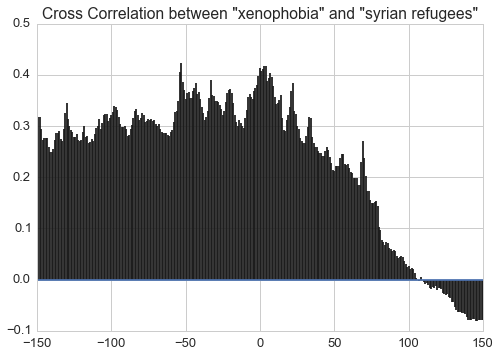

In [194]:
ts_xenophobia = dfxenophobia.xenophobia
ts_syrianrefugees = dfrefugees['syrian refugees']
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_xenophobia.astype(float), 
          ts_syrianrefugees.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "xenophobia" and "syrian refugees"')

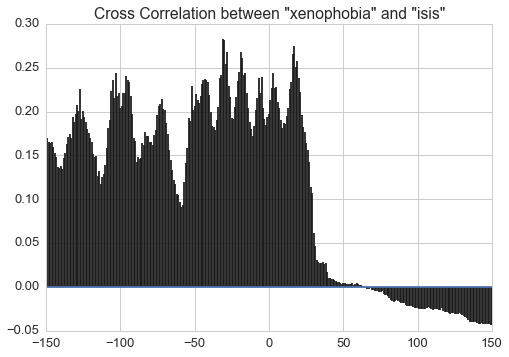

In [201]:
ts_xenophobia = dfxenophobia.xenophobia
ts_isis = dfisis.isis
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_xenophobia.astype(float), 
          ts_isis.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "xenophobia" and "isis"')

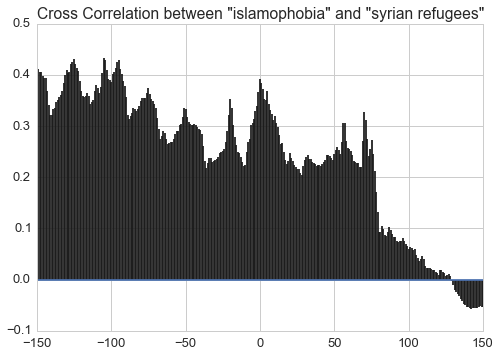

In [202]:
ts_islamophobia = dfislamophobia.islamophobia
ts_syrianrefugees = dfrefugees['syrian refugees']
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_islamophobia.astype(float), 
          ts_syrianrefugees.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "islamophobia" and "syrian refugees"')

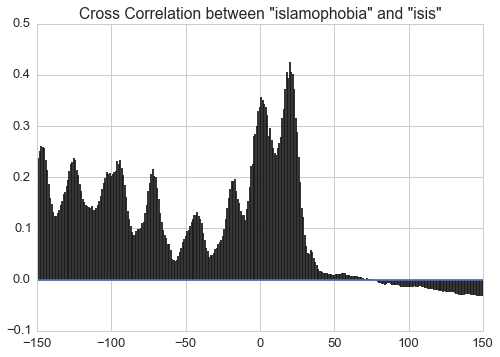

In [203]:
ts_islamophobia = dfislamophobia.islamophobia
ts_isis = dfisis.isis
# Cross correlation plot using matplotlib's xcorr() function
plt.xcorr(ts_islamophobia.astype(float), 
          ts_isis.astype(float),
          maxlags=150);
plt.title('Cross Correlation between "islamophobia" and "isis"')

I picked these queries to check correlation between islamophobia/xenophobia and searches for refugees and isis. I wanted to see if google trends supported a perceived rise in islamophobia/xenophobia following the rise of isis and the refugee crisis developing in the middle east. These query trends are from the United States, so future study could look at google trend correlations in different countires to get a more complete view of what people are searching for and if there are any potential correlations.